In [1]:
from econml.dml import LinearDML
from sklearn.linear_model import LassoCV

C:\Users\varamase\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
import pandas as pd
df = pd.read_csv(r'C:\Users\varamase\OneDrive - Microsoft\UsageToRevenue\Licenses.csv')

In [3]:
df_122020 = df[df['Date'] == '12/31/2020 12:00:00 AM']
df.fillna(0,inplace=True)

In [4]:
#Outcome - M365E5Seats, Treatment - M365E3Seats, confounders - rest
#Single Treatment, Single Outcome
Y = df[['M365E5Seats']]
T = df[['M365E3Seats']]
X = df.drop(columns = ['TPID', 'Date', 'M365E5Seats', 'M365E3Seats'])

In [5]:
from sklearn.model_selection import train_test_split
Y_train, Y_val, T_train, T_val, X_train, X_val = train_test_split(Y, T, X, test_size=.2)

In [ ]:
# Directly using econml
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
est = LinearDML(model_y=RandomForestRegressor(),
                model_t=RandomForestRegressor(),
                random_state=123)
est.fit(Y = Y_train, T = T_train, X=X_train)
te_pred = est.effect(X_test)

C:\Users\varamase\AppData\Local\Continuum\anaconda3\lib\site-packages\econml\utilities.py:821: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return model.fit(X, y, **kwargs)
C:\Users\varamase\AppData\Local\Continuum\anaconda3\lib\site-packages\econml\utilities.py:821: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return model.fit(X, y, **kwargs)
C:\Users\varamase\AppData\Local\Continuum\anaconda3\lib\site-packages\econml\utilities.py:821: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return model.fit(X, y, **kwargs)
C:\Users\varamase\AppData\Local\Continuum\anaconda3\lib\site-packages\econml\utilities.py:821: DataConversionWarning: A column-vector y was passe

In [ ]:
est.summary()
plt.plot(X_test, te_pred, label='DML default')

In [10]:
from sklearn.ensemble import GradientBoostingRegressor

# Using my own models
model1 = GradientBoostingRegressor(n_estimators=10, max_depth=2)
model2 = GradientBoostingRegressor(n_estimators=10, max_depth=2)

est = LinearDML(model_y=model1,
                model_t=model2,
                random_state=123)

est.fit(Y = Y_train, T = T_train, X=X_train)
# te_pred = est.effect(X_test)
# est.summary()
# plt.plot(X_test, te_pred, label='DML default')

C:\Users\varamase\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\varamase\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\varamase\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\varamase\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-v

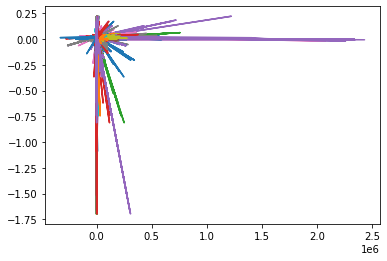

In [33]:
import matplotlib.pyplot as plt

te_pred = est.effect(X_val)
est.summary()
#a = est.effect_interval(X_val)
plt.plot(X_val, te_pred, label='DML default')

In [4]:
#Multiple treatments, single outcome 
Y = df[['M365E5Seats']].values
T = df[['M365E3Seats', 'M365F1Seats']].values
X = df.drop(columns = ['TPID', 'Date', 'M365E5Seats', 'M365E3Seats', 'M365F1Seats']).values

from sklearn.model_selection import train_test_split
Y_train, Y_val, T_train, T_val, X_train, X_val = train_test_split(Y, T, X, test_size=.2)

In [6]:
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor
model1 = GradientBoostingRegressor(n_estimators=10, max_depth=2)
model2 = MultiOutputRegressor(GradientBoostingRegressor(n_estimators=10, max_depth=3))

est = LinearDML(model_y=model1,
                model_t=model2,
                random_state=123)

est.fit(Y = Y_train, T = T_train, X=X_train)

TypeError: '<' not supported between instances of 'GradientBoostingRegressor' and 'int'

In [53]:
#te_pred = est.effect(X_val)
est.summary()
#a = est.const_marginal_effect(X_val)
#len(a)

,point_estimate,point_estimate,stderr,stderr,zstat,zstat,pvalue,pvalue,ci_lower,ci_lower,ci_upper,ci_upper
,T0,T1,T0,T1,T0,T1,T0,T1,T0,T1,T0,T1
X0,0.0,-0.0,0.0,0.0,2.144,-1.668,0.032,0.095,0.0,-0.0,0.0,-0.0
X1,-0.0,0.0,0.0,0.0,-2.752,1.252,0.006,0.21,-0.0,-0.0,-0.0,0.0
X2,0.0,-0.0,0.0,0.0,3.091,-5.479,0.002,0.0,0.0,-0.0,0.0,-0.0
X3,-0.0,0.0,0.0,0.0,-0.554,1.884,0.58,0.06,-0.0,0.0,0.0,0.0
X4,0.0,0.0,0.0,0.0,1.136,1.963,0.256,0.05,-0.0,0.0,0.0,0.0
X5,-0.0,-0.0,0.0,0.0,-1.58,-5.757,0.114,0.0,-0.0,-0.0,0.0,-0.0
X6,-0.0,0.0,0.0,0.0,-2.312,4.121,0.021,0.0,-0.0,0.0,-0.0,0.0
X7,0.0,-0.0,0.0,0.0,1.101,-0.533,0.271,0.594,-0.0,-0.0,0.0,0.0
X8,-0.0,0.0,0.0,0.0,-0.938,1.637,0.348,0.102,-0.0,-0.0,0.0,0.0


In [58]:
a = est.const_marginal_effect(X_val) 
a

array([[[0.0152529 , 0.09809249]],

       [[0.01510758, 0.09985407]],

       [[0.0152529 , 0.09809249]],

       ...,

       [[0.01540649, 0.09468163]],

       [[0.01523084, 0.09880719]],

       [[0.01510112, 0.10144839]]])